In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import scienceplots

plt.style.use(["nature", "no-latex"])

/tmp/ipykernel_25162/4284081116.py:36: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
pkls = {Path(i.name).stem: str(i) for i in Path("./1_regression_models").glob("*.pkl")}
pkls

{'single_logit_sig': '1_regression_models/single_logit_sig.pkl',
 'single_surivival_sig': '1_regression_models/single_surivival_sig.pkl',
 'single_surivival_sig_multivar_res_sig_risk_factors': '1_regression_models/single_surivival_sig_multivar_res_sig_risk_factors.pkl',
 'single_logit_sig_risk_factors': '1_regression_models/single_logit_sig_risk_factors.pkl',
 'risk_factors': '1_regression_models/risk_factors.pkl',
 'PRS_age_sex': '1_regression_models/PRS_age_sex.pkl',
 'multivar_merge_logit_surivival': '1_regression_models/multivar_merge_logit_surivival.pkl',
 'single_surivival_sig_risk_factors': '1_regression_models/single_surivival_sig_risk_factors.pkl',
 'single_logit_sig_multivar_res_sig': '1_regression_models/single_logit_sig_multivar_res_sig.pkl',
 'single_logit_sig_risk_factors_PRS': '1_regression_models/single_logit_sig_risk_factors_PRS.pkl',
 'single_surivival_sig_multivar_res_sig': '1_regression_models/single_surivival_sig_multivar_res_sig.pkl',
 'age_sex': '1_regression_mod

In [3]:
import cuml

# model_obj = pd.read_pickle(pkls["single_surivival_sig_risk_factors_PRS"])
model_obj = pd.read_pickle("4_all_model_ml.pkl")  # Note this file is only name changed
test_imputed = pd.read_pickle(
    "1_test_imputed.pkl"
)  # Note this file is only name changed
combination = pd.read_pickle("4_combination_dict.pkl")

In [4]:
test_imputed = test_imputed.dropna(subset=combination["RF"])
test_imputed

sex  height  weight       BSA  genotype_array   age      PC1  \
0      1.0   171.0    64.2  1.746282               2  44.0  71.3002   
1      0.0   165.0    55.8  1.599219               2  53.0 -12.4815   
2      1.0   171.0    77.3  1.916181               2  62.0 -11.4721   
7      0.0   171.0    73.8  1.872298               2  53.0 -13.8051   
9      0.0   177.0    71.0  1.868377               2  52.0  22.6608   
...    ...     ...     ...       ...             ...   ...      ...   
10190  1.0   194.0   111.5  2.451247               2  59.0 -11.2401   
10191  0.0   156.0    56.2  1.560555               2  47.0  89.6502   
10192  0.0   160.0    64.0  1.686548               2  61.0 -13.2795   
10193  1.0   184.0   104.1  2.306657               2  67.0 -14.3129   
10194  0.0   159.0    56.8  1.583877               2  41.0 -11.2361   

             PC2        PC3        PC4        PC5       PC6        PC7  \
0     -100.66700  81.855800   9.994410  -0.516576  4.576150   1.832860   
1        3.16181  -3.999700   0.309314  -6.865420 -1.982800  -1.245250   
2        2.20519   0.205421  -1.035540  -2.391010 -2.383070   0.886641   
7        5.46987  -4.307390   2.966630  -1.338870 -1.425630   0.249275   
9      -11.82330  28.726600 -80.967500  13.824100 -7.574850 -27.455600   
...          ...        ...        ...        ...       ...        ...   
10190    6.36919  -1.454640   0.493263  -3.298270 -2.062050  -2.349110   
10191 -130.82500  94.235400  28.885200  -3.609980 -6.661040  -4.625900   
10192    4.90337  -1.680180   4.487020   9.191780 -0.761325   0.399757   
10193    1.37825   2.037820   0.217533   1.904070 -1.357880   0.266230   
10194    4.63863  -0.627089   0.635917  -5.071890  2.164910   0.770584   

             PC8      PC9       PC10  assessment_center  age_squared      BMI  \
0       5.045020  1.61431  18.488800                  4       1936.0  21.9555   
1       1.828070 -4.04044  -0.823290                 11       2809.0  20.4959   
2      -0.934631  1.41458   1.704540                  9       3844.0  26.4355   
7      -2.754040  5.32388  -2.011550                  3       2809.0  25.2385   
9     -15.176200 -1.99456   3.787430                  7       2704.0  22.6627   
...          ...      ...        ...                ...          ...      ...   
10190  -1.497980 -2.08661   0.895716                 20       3481.0  31.5248   
10191  -6.542960 -2.72082 -13.781000                  4       2209.0  23.0934   
10192  -0.884922 -1.60040  -2.621980                  8       3721.0  25.0000   
10193   0.996555 -0.59830  -3.291160                  9       4489.0  30.7479   
10194  -1.732380 -1.51917  -4.123390                  4       1681.0  22.4675   

       dbp_a  sbp_a   tc_a   tg_a  hdl_a  ldl_a    dbp    sbp     tc     tg  \
0       76.0  115.0  5.851  0.893  1.635  3.549   76.0  115.0  5.851  0.893   
1      100.0  150.0  7.407  3.176  1.415  4.840  100.0  150.0  7.407  3.176   
2       81.0  144.0  5.909  1.869  1.670  3.587   81.0  144.0  5.909  1.869   
7       76.0  130.0  6.191  0.930  1.951  3.586   76.0  130.0  6.191  0.930   
9       60.0  106.0  5.411  0.766  1.675  3.369   60.0  106.0  5.411  0.766   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10190   72.0  120.0  6.671  7.376  0.762  4.060   72.0  120.0  6.671  7.376   
10191   84.0  129.0  4.979  0.402  1.950  2.606   84.0  129.0  4.979  0.402   
10192   81.0  154.0  5.482  1.525  1.158  3.807   81.0  154.0  4.386  1.296   
10193   75.0  148.0  4.699  1.956  0.940  3.084   75.0  148.0  4.699  1.956   
10194   82.0  125.0  5.914  0.647  1.772  3.694   82.0  125.0  5.914  0.647   

         hdl    ldl   apob  cad  mi    crp        eGFR     Cr  CAD   cad_date  \
0      1.635  3.549  1.002    0   0   0.48  112.310853   69.9    0        NaT   
1      1.415  4.840  1.433    0   0   1.32   82.185961   74.9    0        NaT   
2      1.670  3.587  1.025    0   0   1.93   85.913239   87.7    0        NaT   
7      1.951  3.586

In [5]:
from ppp_aging.model import cal_binary_metrics, cal_binary_metrics_bootstrap

In [6]:
%%time
# method = "LR"
metrics_result = {}
for method in model_obj.keys():
    model = model_obj[method]["model"]
    if hasattr(model, "predict_proba"):
        pred_res = model.predict_proba(test_imputed[combination[method]]).iloc[:, 1]
    else:
        pred_res = model.predict(test_imputed[combination[method]].values)
    y_true = test_imputed["incident_cad"]
    metrics_result[method] = cal_binary_metrics_bootstrap(
        y_true, pred_res, ci_kwargs={"n_resamples": 1000}
    )


In [ ]:
# only for match combination and feature raw name
metrics_result = pd.read_csv("auc_df.csv")[["feature", "combination"]].merge(
    pd.DataFrame(metrics_result).T.reset_index(names="combination"), how="outer"
)
metrics_result

,feature,combination,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI
0,age_sex,AS,0.716839,0.740845,0.692405,0.652928,0.662934,0.643285,0.473520,0.483233,0.463050,0.653759,0.698738,0.610665,0.652882,0.663785,0.643463,0.115305,0.132231,0.095623
1,PRS_age_sex,PRS + AS,0.743611,0.766342,0.720981,0.601109,0.611961,0.591465,0.453926,0.464248,0.444365,0.774487,0.813266,0.735102,0.591424,0.600919,0.581116,0.139362,0.160936,0.115545
2,risk_factors,RF,0.748043,0.769378,0.726248,0.640516,0.650880,0.630995,0.474608,0.484805,0.464645,0.742597,0.782181,0.704082,0.634814,0.646094,0.624679,0.133896,0.152883,0.109825
3,PRS_risk_factors,PRS + RF,0.764749,0.786128,0.744032,0.712581,0.722704,0.702934,0.514412,0.525535,0.503779,0.697039,0.744826,0.654826,0.713450,0.722726,0.703277,0.157603,0.183483,0.129168
4,single_surivival_sig_multivar_res_sig,COX(P_cutoff),0.719989,0.743717,0.695801,0.742950,0.752115,0.734273,0.518568,0.530937,0.507121,0.569476,0.614271,0.525200,0.752640,0.761967,0.742825,0.134112,0.156447,0.106755
5,single_surivival_sig_multivar_res_sig_risk_fac...,COX(P_cutoff) + RF,0.774452,0.795127,0.753185,0.660762,0.671011,0.650636,0.489419,0.500224,0.478769,0.769932,0.810274,0.730925,0.654663,0.664711,0.644263,0.165504,0.191665,0.133535
6,single_surivival_sig_multivar_res_sig_risk_fac...,COX(P_cutoff) + RF + PRS,0.785920,0.807205,0.766774,0.710894,0.720297,0.701253,0.519269,0.529705,0.507520,0.751708,0.790039,0.709727,0.708614,0.717929,0.698702,0.189801,0.221549,0.152772
7,single_logit_sig_multivar_res_sig,LR(P_cutoff),0.758299,0.783186,0.736454,0.608942,0.619908,0.598816,0.460092,0.470409,0.450591,0.792711,0.835449,0.754570,0.598677,0.609764,0.588176,0.166741,0.194186,0.133622
8,multivar_merge_logit_surivival,LR(P_cutoff) + COX(P_cutoff),0.758178,0.780288,0.736871,0.631116,0.641359,0.621234,0.471626,0.481405,0.460963,0.772210,0.810631,0.734173,0.623235,0.633731,0.612111,0.169841,0.196432,0.136231
9,single_logit_sig_multivar_res_sig_risk_factors,LR(P_cutoff) + RF,0.780404,0.801727,0.760176,0.634852,0.644857,0.624364,0.476281,0.486688,0.465858,0.799544,0.839515,0.760031,0.625652,0.636235,0.615159,0.183471,0.213894,0.149667


In [8]:
metrics_result.to_csv("4_incident_cad_metrics.csv", index=False)

- LR: Logistic Regression
- AS: Age_Sex
- RF: Risk Factors
- COX: Cox Regression
- P_cutoff: 按照P值进行过率后剩下的蛋白在对应方法的多元回归显著的结果



In [19]:
plt_data

,feature,combination,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI
16,single_surivival_sig,COX,0.767949,0.791264,0.746460,0.699325,0.709328,0.689440,0.507710,0.517987,0.497604,0.712984,0.754674,0.670769,0.698562,0.708966,0.687210,0.175053,0.203394,0.141883
13,single_logit_sig,LR,0.765751,0.788694,0.745075,0.704266,0.714027,0.694987,0.509612,0.520298,0.498882,0.701595,0.745924,0.659590,0.704415,0.714202,0.694286,0.171425,0.197789,0.137636
7,single_logit_sig_multivar_res_sig,LR(P_cutoff),0.758299,0.783186,0.736454,0.608942,0.619908,0.598816,0.460092,0.470409,0.450591,0.792711,0.835449,0.754570,0.598677,0.609764,0.588176,0.166741,0.194186,0.133622
2,risk_factors,RF,0.748043,0.769378,0.726248,0.640516,0.650880,0.630995,0.474608,0.484805,0.464645,0.742597,0.782181,0.704082,0.634814,0.646094,0.624679,0.133896,0.152883,0.109825
4,single_surivival_sig_multivar_res_sig,COX(P_cutoff),0.719989,0.743717,0.695801,0.742950,0.752115,0.734273,0.518568,0.530937,0.507121,0.569476,0.614271,0.525200,0.752640,0.761967,0.742825,0.134112,0.156447,0.106755
0,age_sex,AS,0.716839,0.740845,0.692405,0.652928,0.662934,0.643285,0.473520,0.483233,0.463050,0.653759,0.698738,0.610665,0.652882,0.663785,0.643463,0.115305,0.132231,0.095623


In [51]:
metrics_result["combination"]

0                                          AS
1                                    PRS + AS
2                                          RF
3                                    PRS + RF
4                               COX(P_cutoff)
5                          COX(P_cutoff) + RF
6                    COX(P_cutoff) + RF + PRS
7                                LR(P_cutoff)
8               LR(P_cutoff) + COX(P_cutoff) 
9                           LR(P_cutoff) + RF
10                    LR(P_cutoff) + RF + PRS
11          LR(P_cutoff) + COX(P_cutoff) + RF
12    LR(P_cutoff) + COX(P_cutoff) + RF + PRS
13                                         LR
14                                    LR + RF
15                               LR + RF +PRS
16                                        COX
17                                   COX + RF
18                             COX + RF + PRS
Name: combination, dtype: object

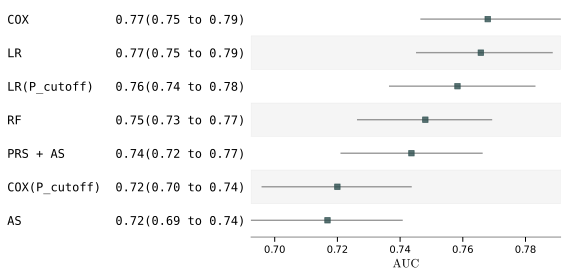

In [39]:
%matplotlib inline 
import forestplot as fp

first_compare_combination_list = [
    "AS",
    "RF",
    "PRS + AS",
    "LR",
    "COX",
    "LR(P_cutoff)",
    "COX(P_cutoff)",
]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))


plt_data = metrics_result.sort_values("AUC", ascending=False)
plt_data = plt_data[plt_data["combination"].isin(first_compare_combination_list)]


fp.forestplot(
    plt_data,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="combination",
    ylabel="",
    xlabel="AUC",
    capitalize=True,
    table=True,
    sort=True,

    sortby="AUC",
    color_alt_rows=True,
    ax=ax,
    mcolor=["#FAD02E", "#4477AA"],
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        "offset": 0.35,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": ".8",  # gray color for x-reference line
    },
)
fig.tight_layout()
fig.savefig("figs/fig1_proteomics_vs_RF_vsPRS.svg", bbox_inches="tight")

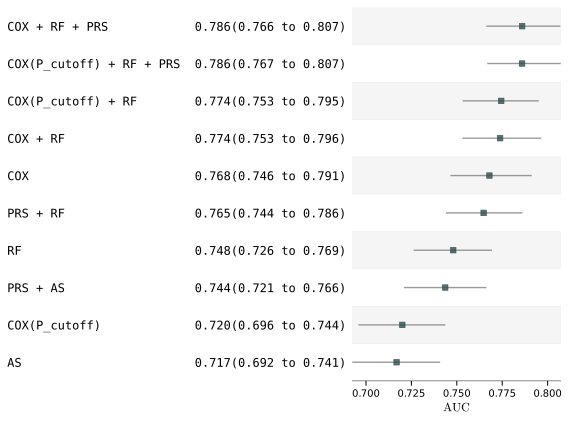

In [55]:
%matplotlib inline 
import forestplot as fp
second_compare_combination_list = [
    "COX + RF + PRS",
    "COX + RF",
    "COX",
    "COX(P_cutoff)",
    "COX(P_cutoff) + RF",
    "COX(P_cutoff) + RF + PRS",
    "PRS + RF",
    "PRS + AS",
    "RF",
    "AS"

]



fig, ax = plt.subplots(1, 1, figsize=(8, 6))


plt_data = metrics_result.sort_values("AUC", ascending=False)
plt_data = plt_data[plt_data["combination"].isin(second_compare_combination_list)]


fp.forestplot(
    plt_data,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="combination",
    ylabel="",
    xlabel="AUC",
    capitalize=True,
    table=True,
    sort=True,
decimal_precision=3,
    sortby="AUC",
    color_alt_rows=True,
    ax=ax,
    mcolor=["#FAD02E", "#4477AA"],
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        "offset": 0.35,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": ".8",  # gray color for x-reference line
    },
)
fig.tight_layout()
# fig.savefig("figs/fig1_proteomics_vs_RF_vsPRS.svg", bbox_inches="tight")

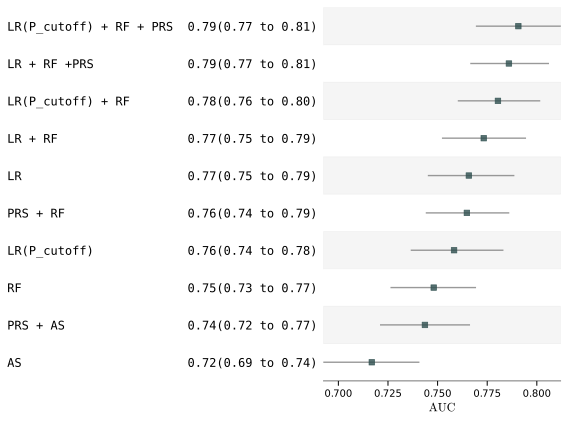

In [53]:
%matplotlib inline 
import forestplot as fp
third_compare_combination_list = [
    "LR + RF +PRS",
    "LR + RF",
    "LR",
    "LR(P_cutoff)",
    "LR(P_cutoff) + RF",
    "LR(P_cutoff) + RF + PRS",
    "PRS + RF",
    "PRS + AS",
    "RF",
    "AS"

]



fig, ax = plt.subplots(1, 1, figsize=(8, 6))


plt_data = metrics_result.sort_values("AUC", ascending=False)
plt_data = plt_data[plt_data["combination"].isin(third_compare_combination_list)]


fp.forestplot(
    plt_data,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="combination",
    ylabel="",
    xlabel="AUC",
    capitalize=True,
    table=True,
    sort=True,

    sortby="AUC",
    color_alt_rows=True,
    ax=ax,
    mcolor=["#FAD02E", "#4477AA"],
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        "offset": 0.35,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": ".8",  # gray color for x-reference line
    },
)
fig.tight_layout()
# fig.savefig("figs/fig1_proteomics_vs_RF_vsPRS.svg", bbox_inches="tight")

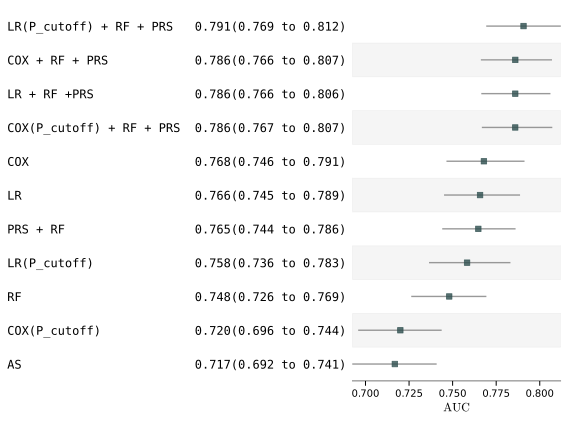

: 

In [57]:
%matplotlib inline 
import forestplot as fp
fourthcompare_combination_list = [
    "LR + RF +PRS",
    "LR(P_cutoff) + RF + PRS",
    "COX + RF + PRS",
    "COX(P_cutoff) + RF + PRS",
    "PRS + RF",
    "RF",
    "AS",
    "COX",
    "COX(P_cutoff)",
    "LR",
    "LR(P_cutoff)",

]



fig, ax = plt.subplots(1, 1, figsize=(8, 6))


plt_data = metrics_result.sort_values("AUC", ascending=False)
plt_data = plt_data[plt_data["combination"].isin(fourthcompare_combination_list)]


fp.forestplot(
    plt_data,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="combination",
    ylabel="",
    xlabel="AUC",
    decimal_precision=3,
    capitalize=True,
    table=True,
    sort=True,
    sortby="AUC",
    color_alt_rows=True,
    ax=ax,
    mcolor=["#FAD02E", "#4477AA"],
    # Additional kwargs for customizations
    **{
        "markersize": 30,
        # override default vertical offset between models (0.0 to 1.0)
        "offset": 0.35,
        "xlinestyle": (0, (10, 5)),  # long dash for x-reference line
        "xlinecolor": ".8",  # gray color for x-reference line
    },
)
fig.tight_layout()
# fig.savefig("figs/fig1_proteomics_vs_RF_vsPRS.svg", bbox_inches="tight")

/tmp/ipykernel_5800/3396311240.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


(0.7, 0.78)

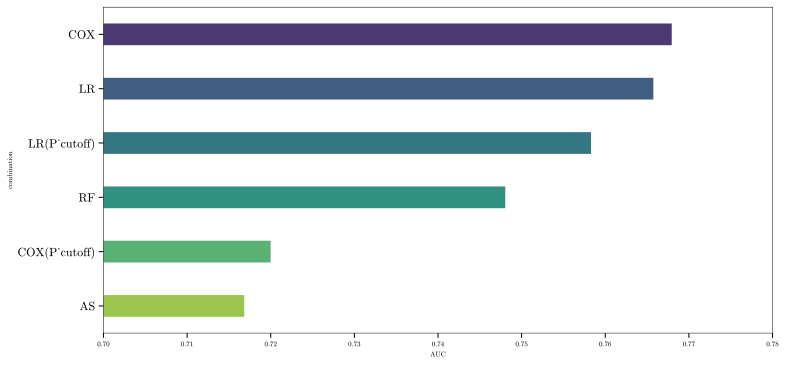

In [17]:
# first_compare_combination_list = [
#     "AS",
#     "RF",
#     "PRS",
#     "LR",
#     "COX",
#     "LR(P_cutoff)",
#     "COX(P_cutoff)",
# ]

# fig, ax = plt.subplots(1, 1, figsize=(12, 6))


# plt_data = metrics_result.sort_values("AUC", ascending=False)
# plt_data = plt_data[plt_data["combination"].isin(first_compare_combination_list)]
# sns.barplot(
#     data=plt_data,
#     y="combination",
#     x="AUC",
#     ax=ax,
#     gap=0.5,
#     palette="viridis",
# )
# plt.setp(ax.get_yticklabels(), fontsize=12)
# # ax.set_ylim(0.7, 0.81)
# ax.set_xlim(0.7, 0.78)

# # ax.set

/tmp/ipykernel_21040/585694077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


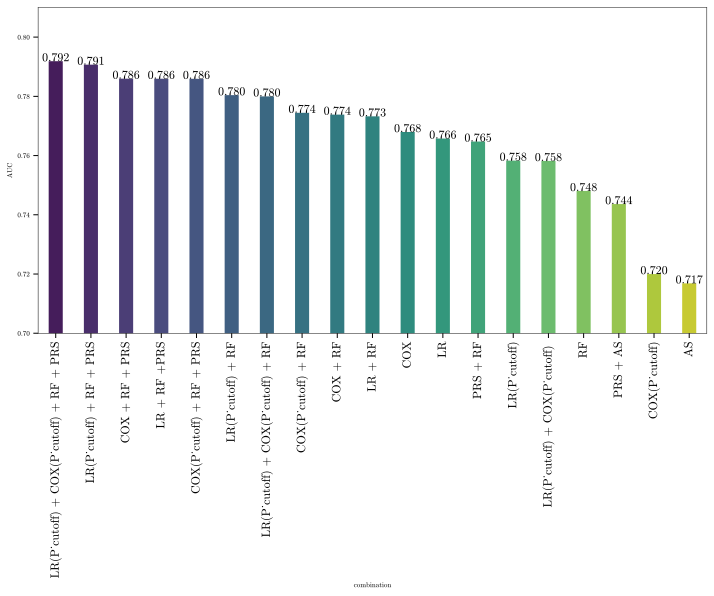

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))


plt_data = metrics_result.sort_values("AUC", ascending=False)
sns.barplot(
    data=plt_data,
    x="combination",
    y="AUC",
    ax=ax,
    gap=0.5,
    palette="viridis",
)
ax.set_ylim(0.7, 0.81)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)

for patch in ax.patches:
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        f"{patch.get_height():.3f}",
        ha="center",
        fontsize=12,
    )
fig.savefig("1.1_ml_compared.png", dpi=400, bbox_inches="tight")

In [32]:
from sklearn.metrics import f1_score

# from torch import

res = result_dict["age_sex"]


train_mean = res["train_data"]["incident_cad_pred"].mean()
train_std = res["train_data"]["incident_cad_pred"].std()

test_data = res["test_data"]
# f1_score
# y_true = np.eye(2)[test_data["incident_cad"].values]
y_true = test_data["incident_cad"].values
# y_pred_zscore = (test_data["incident_cad_pred"].values - train_mean) / train_std

y_pred = test_data["incident_cad_pred"].values
# y_true = np.F.one_hot(tensor, num_classes=0)

# f1_score(test["incident_cad"], test["incident_cad_pred"].values, average="weighted")

In [52]:
import torch
from torchmetrics.classification import SpecificityAtSensitivity


y_pred = torch.tensor(y_pred)
y_true = torch.tensor(y_true)

metric = SpecificityAtSensitivity(min_sensitivity=1, task="binary")
metric(y_pred, y_true)

/tmp/ipykernel_20839/2948767098.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred)
/tmp/ipykernel_20839/2948767098.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


(tensor(0.0176), tensor(0.4954, dtype=torch.float64))

In [49]:
from torchmetrics.classification import ConfusionMatrix

cf = ConfusionMatrix(num_classes=2, task="binary")
cf(y_pred, y_true)

tensor([[ 795, 7064],
        [   4,  435]])

<Axes: xlabel='incident_cad_pred', ylabel='Density'>

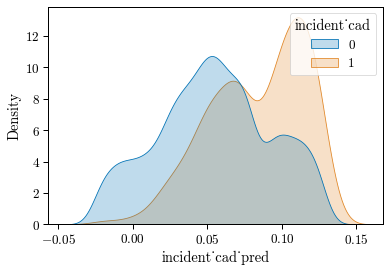

In [54]:
sns.kdeplot(
    test_data, x="incident_cad_pred", hue="incident_cad", fill=True, common_norm=False
)